In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.dtypes
# В dataframe попатаются значения с типами данных: object, float64, int64

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isna().sum()
#у меня нет пропусков, так что удалять не буду!!!

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.shape

(1338, 7)

In [9]:
del df['children']
df.head()



,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [10]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())
#тут буквы, а зачем они нам, правильно?

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
def nn(value):
  if value == 'female':
    return 0
  elif value == 'male':
    return 1
  else:
    return value
def nc(value):
  if value == 'yes':
    return 0
  elif value == 'no':
    return 1
  else:
    return value
def nm(value):
  if value == 'southwest':
    return 0
  elif value == 'southeast':
    return 1
  elif value == 'northwest':
    return 2
  elif value == 'northeast':
    return 3
  else:
    return value
df['sex'] = df['sex'].apply(nn)
df['smoker'] = df['smoker'].apply(nc)
df['region'] = df['region'].apply(nm)
#буквы на цифорки заменил ☆*:.｡.o(≧▽≦)o.｡.:*☆
df.head()


,age,sex,bmi,smoker,region,charges
0,19,0,27.900,0,0,16884.92400
1,18,1,33.770,1,1,1725.55230
2,28,1,33.000,1,1,4449.46200
3,33,1,22.705,1,2,21984.47061
4,32,1,28.880,1,2,3866.85520


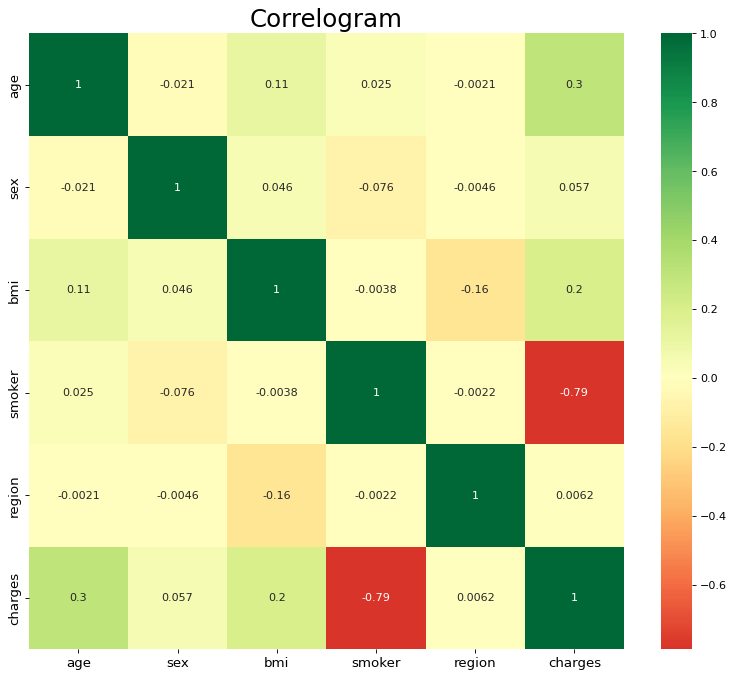

In [12]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#Корреляция очень маленькая в столбце children, ну а я его удалю.

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x79e2a0420ee0>, <matplotlib.lines.Line2D object at 0x79e2a0421180>], 'caps': [<matplotlib.lines.Line2D object at 0x79e2a0421420>, <matplotlib.lines.Line2D object at 0x79e2a04216c0>], 'boxes': [<matplotlib.lines.Line2D object at 0x79e2a0420c40>], 'medians': [<matplotlib.lines.Line2D object at 0x79e2a0421960>], 'fliers': [<matplotlib.lines.Line2D object at 0x79e2a0421c00>], 'means': []})

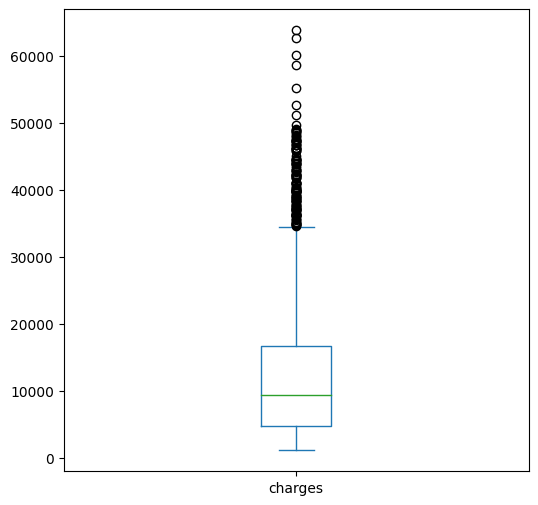

In [ ]:

df.charges.plot.box(return_type='both', figsize=(6,6))
#выбросы есть выше 35000

In [13]:
# вектор признаков
X = df.drop(columns=['charges', 'sex', 'region'])

# вектор целевой переменной (＠＾◡＾)
Y = df['charges']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')
#80%  на треню программы, а 20% на тесты)) (◕‿◕)

Train dataset size: (1070, 3), (1070,)
Test dataset size: (268, 3), (268,)


In [14]:
# делаем модель линейной регрессии
model = LinearRegression()
# учим наше детё на тренировочном стандартизированном наборе данных (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Веса всех признаков (w1, ..., w5): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
#получили вес и коэффицент уравнения

Веса всех признаков (w1, ..., w5):  [   254.7639958     333.41922367 -23644.69910236]
Свободный коэффицент уравнения w0: 11627.953100527131


In [16]:
# создадим массив названия признаков
features = X_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
2,-23644.699102,smoker
0,254.763996,age
1,333.419224,bmi


In [17]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
#Сделаем предсказания

Mean Absolute Error: 4408.697536568362
Mean Squared Error: 43688978.384665176
R2 score: 0.7182109110986865


In [ ]:
#все плохо, очень большие мае и мсе, мое детё бездарно .｡･ﾟﾟ･(＞_＜)･ﾟﾟ･｡.

In [20]:
#Масштабирование
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd

mmsc = MinMaxScaler()
x_norm = mmsc.fit_transform(X_train)
x_testnorm = mmsc.transform(X_test)
model = LinearRegression()
model.fit(x_norm, y_train)

print('Веса всех признаков (x1, ..., x3): ', model.coef_)
print('Свободный коэффицент: ', model.intercept_)

y_pred = model.predict(x_testnorm)

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

Веса всех признаков (x1, ..., x3):  [ 11719.14380674  12393.19254399 -23644.69910236]
Свободный коэффицент:  21535.0758347515
Mean Absolute Error:  4408.697536568362
Mean Squared Error:  43688978.384665176
R2:  0.7182109110986865


In [21]:
df['bmi'].mean()

30.66339686098655

ну лучше стало, но все равно грустно ｡ﾟ･ (>﹏<) ･ﾟ｡